In [1]:
import numpy as np


In [4]:
#Define sigmoid and sigmoid derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
#Inputs and Target values
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])


In [6]:
#Set parameters and initialize weights and biases
input_size = 1
hidden_layer1_size = 10
output_size = 1

weights1 = np.random.randn(input_size, hidden_layer1_size)
biases1 = np.random.randn(hidden_layer1_size)

weights2 = np.random.randn(hidden_layer1_size, output_size)
biases2 = np.random.randn(output_size)




In [7]:
#Training
learning_rate = 0.01
epochs = 1000
errors = []

for epoch in range(epochs):
    #Forward pass
    layer1_output = sigmoid(X.reshape(-1, 1) @ weights1 + biases1)
    Y_pred = layer1_output @ weights2 + biases2

    #Calculate error
    error = np.mean(0.5 * (Y_pred.reshape(-1) - Y)**2)
    errors.append(error)
    
    #Backprop
    d2 = Y_pred.reshape(-1) - Y
    dW2 = layer1_output.T @ d2.reshape(-1, 1)
    dB2 = np.sum(d2.reshape(-1, 1), axis=0)
    
    d1 = d2.reshape(-1, 1) @ weights2.T * sigmoid_derivative(layer1_output)
    dW1 = X.reshape(-1, 1).T @ d1
    dB1 = np.sum(d1, axis=0)

    weights1 -= learning_rate * dW1
    biases1 -= learning_rate * dB1
    
    weights2 -= learning_rate * dW2
    biases2 -= learning_rate * dB2


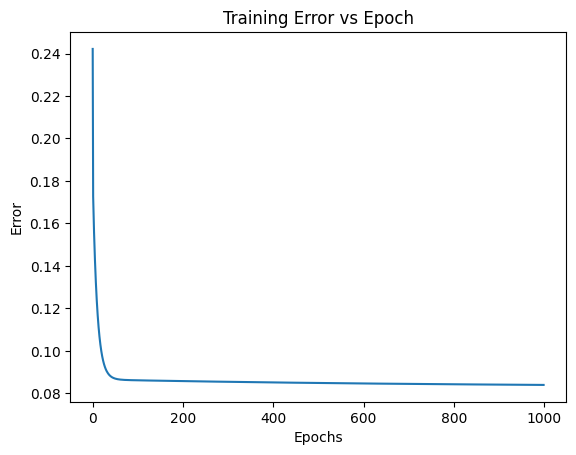

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error vs Epoch')
plt.show()


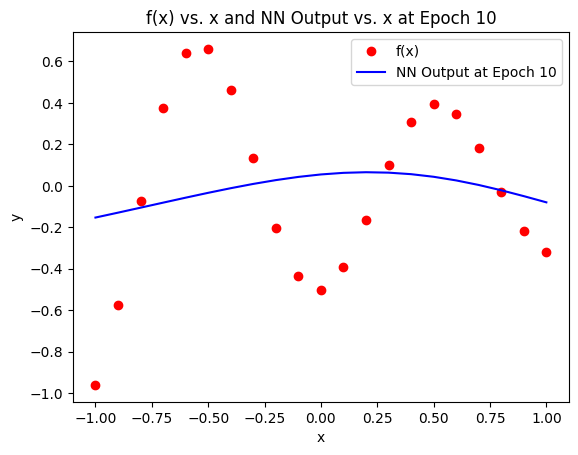

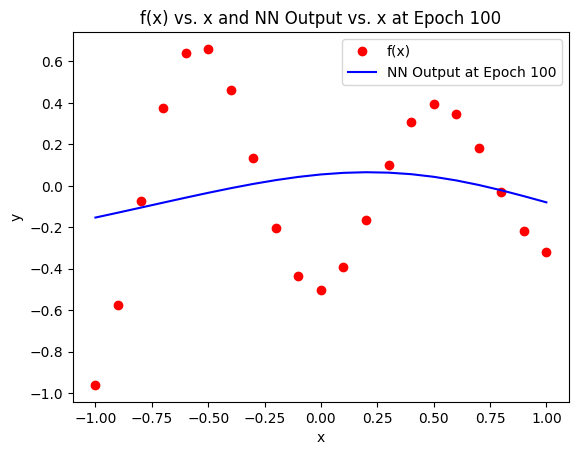

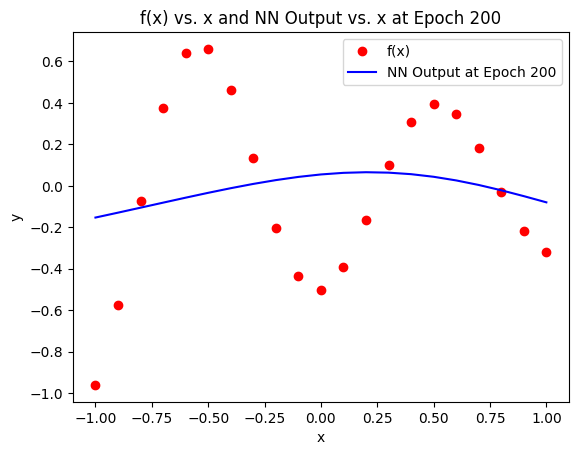

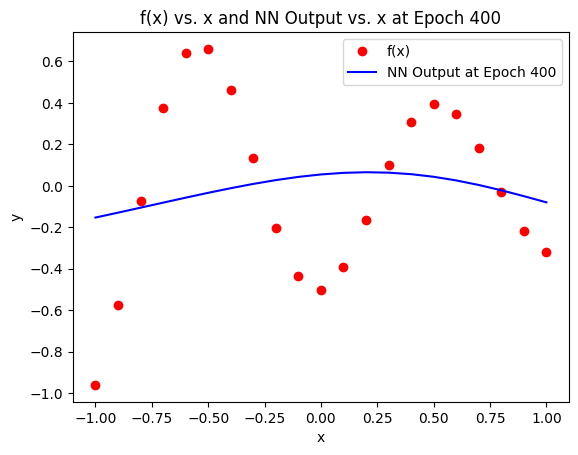

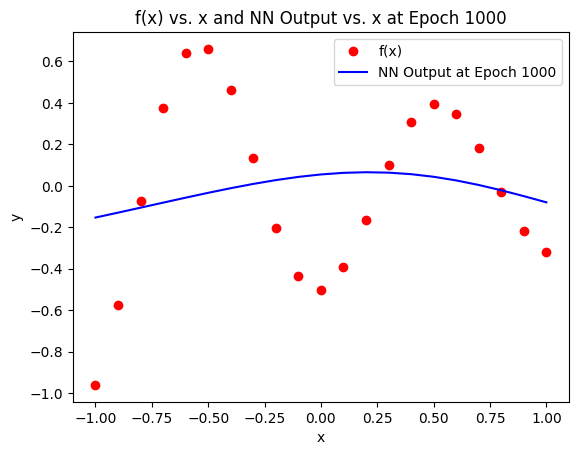

In [10]:
def forward_propagation(X):
    layer1_output = sigmoid(X.reshape(-1, 1) @ weights1 + biases1)
    Y_pred = layer1_output @ weights2 + biases2
    return Y_pred

specified_epochs = [10, 100, 200, 400, 1000]

for epoch_num in specified_epochs:
    if epoch_num <= epochs:
        plt.figure()
        plt.plot(X, Y, 'ro', label='f(x)')
        plt.plot(X, forward_propagation(X), 'b-', label='NN Output at Epoch ' + str(epoch_num))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('f(x) vs. x and NN Output vs. x at Epoch ' + str(epoch_num))
        plt.show()
